In [138]:
# import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gc
import traceback
from swifter import swiftapply
import os
import seaborn as sns
import random

In [7]:
%lsmagic # jupyter의 숨겨진 기능들. 

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%rub

<h3>데이터 불러오기. - 주의. 데이터 매우 큼. 600MB 이상의 csv 파일임.</h3>

In [2]:
df = pd.read_csv("nubija_15-16.csv", sep=',', encoding='EUC-KR')

In [ ]:
chr(0xc0) # utf-8 인코딩은 오류남.

'À'

In [4]:
df.head()

,Unnamed: 0,자전거번호,출발터미널,출발일,출발시간,도착터미널,도착일,도착시간
0,1,5322,180,20150101,0,180,20150101,19
1,2,6844,94,20150101,10,144,20150101,1435
2,3,5475,180,20150101,35,107,20150101,345
3,4,6347,28,20150101,36,121,20150101,91100
4,5,7416,9,20150101,41,60,20150101,1109


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11718608 entries, 0 to 11718607
Data columns (total 8 columns):
Unnamed: 0    int64
자전거번호         int64
출발터미널         int64
출발일           int64
출발시간          int64
도착터미널         int64
도착일           int64
도착시간          int64
dtypes: int64(8)
memory usage: 715.2 MB


<h3>'unnamed: 0' (index) 컬럼 제거하고 column명 영어로 변경</h3>

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
col_kor2eng = {"자전거번호":"id", "출발터미널":"dept_terminal", "출발일":"dept_date", "출발시간":"dept_time", "도착터미널":"arr_terminal", "도착일":"arr_date", "도착시간":"arr_time" }

In [8]:
df.rename(columns=col_kor2eng, inplace=True)

<h3>todatetime하기 전에 int64인 날짜, 시간 zero fill하고 str으로 바꿈. </h3>
<h3>bike id와 terminal id도 str으로 바꿔줌.</h3>

In [9]:
print(str(91100).zfill(6))
type(str(91100).zfill(6))

091100


str

In [10]:
df.head()

,id,dept_terminal,dept_date,dept_time,arr_terminal,arr_date,arr_time
0,5322,180,20150101,0,180,20150101,19
1,6844,94,20150101,10,144,20150101,1435
2,5475,180,20150101,35,107,20150101,345
3,6347,28,20150101,36,121,20150101,91100
4,7416,9,20150101,41,60,20150101,1109


In [11]:
df["id"] = df["id"].astype(str)
df["dept_terminal"] = df["dept_terminal"].astype(str)
df["arr_terminal"] = df["arr_terminal"].astype(str)

In [12]:
# HHMMSS를 나타내는 6자리 값이어야 하는데, int면 그냥 0103 이런 식으로 존재하므로 "000103" 이런 형식으로 고쳐줌. 
df["dept_date"] = df["dept_date"].astype(str).apply(lambda x: x.zfill(6))  
df["dept_time"] = df["dept_time"].astype(str).apply(lambda x: x.zfill(6))
df["arr_date"] = df["arr_date"].astype(str).apply(lambda x: x.zfill(6))
df["arr_time"] = df["arr_time"].astype(str).apply(lambda x: x.zfill(6))

In [13]:
df.tail(50)

,id,dept_terminal,dept_date,dept_time,arr_terminal,arr_date,arr_time
11718558,6222,21,20161231,234732,244,20170101,003611
11718559,7880,62,20161231,234817,130,20161231,235412
11718560,6185,140,20161231,234827,182,20161231,235832
11718561,7870,173,20161231,234842,174,20161231,235426
11718562,8445,167,20161231,234906,189,20161231,235220
11718563,5580,56,20161231,234910,40,20170101,000330
11718564,8459,54,20161231,234951,136,20161231,235920
11718565,5362,62,20161231,234952,64,20161231,235909
11718566,7546,155,20161231,234953,42,20161231,235928
11718567,5573,17,20161231,234955,277,20170101,002740


In [14]:
df["dept_time"] = df["dept_date"]+df["dept_time"]
df["arr_time"] = df["arr_date"]+df["arr_time"]

In [15]:
df['dept_time'] = pd.to_datetime(df['dept_time'], format="%Y%m%d%H%M%S", errors = 'ignore')
df['arr_time'] = pd.to_datetime(df['arr_time'], format="%Y%m%d%H%M%S", errors = 'ignore')

In [16]:
df = df.drop(["dept_date", "arr_date"], axis=1)

,id,dept_terminal,dept_time,arr_terminal,arr_time
0,5322,180,2015-01-01 00:00:00,180,2015-01-01 00:00:19
1,6844,94,2015-01-01 00:00:10,144,2015-01-01 00:14:35
2,5475,180,2015-01-01 00:00:35,107,2015-01-01 00:03:45
3,6347,28,2015-01-01 00:00:36,121,2015-01-01 09:11:00
4,7416,9,2015-01-01 00:00:41,60,2015-01-01 00:11:09
5,7282,148,2015-01-01 00:00:47,121,2015-01-01 00:19:10
6,7978,21,2015-01-01 00:00:52,59,2015-01-01 00:16:04
7,6777,28,2015-01-01 00:00:53,155,2015-01-01 00:05:53
8,7389,11,2015-01-01 00:00:55,27,2015-01-01 00:11:14
9,7115,222,2015-01-01 00:01:12,218,2015-01-01 00:10:24


<h3>여기서 잠깐 EDA</h3>

In [28]:
len(df.id.unique()) # 총 자전거의 갯수

3872

In [29]:
len(df.dept_terminal.unique()) # 출발지 터미널 갯수

266

In [30]:
len(df.arr_terminal.unique()) # 도착지 터미널 갯수

267

<h3>usedtime = arr_time - dept_time 변수 생성 (time delta) & 여태까지 한거 저장.(dtype 유지를 위해서 pickle로 저장)</h3>

In [17]:
df["usedtime"] = (df.arr_time - df.dept_time ).astype("timedelta64[ns]")

In [19]:
df.head(100)

,id,dept_terminal,dept_date,dept_time,arr_terminal,arr_date,arr_time,usedtime
0,5322,180,20150101,2015-01-01 00:00:00,180,20150101,2015-01-01 00:00:19,00:00:19
1,6844,94,20150101,2015-01-01 00:00:10,144,20150101,2015-01-01 00:14:35,00:14:25
2,5475,180,20150101,2015-01-01 00:00:35,107,20150101,2015-01-01 00:03:45,00:03:10
3,6347,28,20150101,2015-01-01 00:00:36,121,20150101,2015-01-01 09:11:00,09:10:24
4,7416,9,20150101,2015-01-01 00:00:41,60,20150101,2015-01-01 00:11:09,00:10:28
5,7282,148,20150101,2015-01-01 00:00:47,121,20150101,2015-01-01 00:19:10,00:18:23
6,7978,21,20150101,2015-01-01 00:00:52,59,20150101,2015-01-01 00:16:04,00:15:12
7,6777,28,20150101,2015-01-01 00:00:53,155,20150101,2015-01-01 00:05:53,00:05:00
8,7389,11,20150101,2015-01-01 00:00:55,27,20150101,2015-01-01 00:11:14,00:10:19
9,7115,222,20150101,2015-01-01 00:01:12,218,20150101,2015-01-01 00:10:24,00:09:12


In [20]:
df.to_pickle('nubija_15-16_pickled.p')

In [27]:
gc.collect()

14

<h1 style='color:red'>저장한 파일 불러와서 작업</h1>

<h3>하지만 메모리를 너무 많이 먹어서 오류남. object type column이 주로 메모리를 소비하므로 최적화를 위해 uint16으로 바꿔주고 .pickle로 다시 저장. 그 결과 메모리 소비량이 반 이상 줄음. (아래 블록은 그냥 기록을 위해 남김.) </h3>

In [60]:
df = pd.read_pickle('nubija_15-16_pickled.p')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11718608 entries, 0 to 11718607
Data columns (total 7 columns):
id               uint16
dept_terminal    uint16
dept_time        datetime64[ns]
arr_terminal     uint16
arr_time         datetime64[ns]
usedtime         timedelta64[ns]
usedtime_hour    float64
dtypes: datetime64[ns](2), float64(1), timedelta64[ns](1), uint16(3)
memory usage: 424.7 MB


In [11]:
df["id"] = df["id"].astype('uint16')

In [12]:
df["dept_terminal"] = df["dept_terminal"].astype('uint16')
df["arr_terminal"] = df["arr_terminal"].astype('uint16')

In [14]:
df = df.drop(["dept_date", "arr_date"], axis=1)

In [41]:
df['usedtime_hour'] = df['usedtime'].apply(lambda x: (x.seconds)/3600)

In [42]:
df.to_pickle('nubija_15-16_pickled.p')

<h3>터미널 간 이동 거리 distance 컬럼을 추가하고 & avg_speed = distance / usedtime 컬럼도 추가함. </h3>
<h3>추후 시속을 구하기 위해 usedtime_hour도 생성 (dtype: float)</h3>

distance_dic도 dictionary보다 pandas df가 더 빠를 수 있다는 말이 있으므로 pandas df를 불러들여 해보겠음. 

In [19]:
# with open('distance_dic_pickle.p', 'rb') as fp:
#     distance_dic = pickle.load(fp)

# dictionary로 저장된 pickle 읽어들임. 

<p style='color: red;'>참조할 distance df 불러들인다.</p>

In [62]:
# df로 저장된 pickle 읽어들임. 
distance_df = pd.read_pickle("distance_dic_df.p")

In [5]:
distance_df

,dept_terminal,arr_terminal,distance
0,8,8,0.00
1,8,9,0.85
2,9,8,0.85
3,8,10,1.20
4,10,8,1.20
5,8,11,2.59
6,11,8,2.59
7,8,12,1.28
8,12,8,1.28
9,8,15,4.97


In [2]:
##아래 작업이 너무 많이 걸려서 progress bar를 넣어서 관찰하기로 함. 
## 사용법 간단함. 그냥 log_progress( ) 만 씌우면 됨. 

##### progress bar #####

def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [19]:
## distance 를 distance_dic에서 검색해 입력해준다. 

# 이대로 돌리면 분당 700 row정도 처리함. 
# iterrows 는 performance issue가 있다. 특수한 상황에서만 쓰여야 한다. 
# https://stackoverflow.com/questions/24870953/does-iterrows-have-performance-issues

# df['distance'] = 0

# for index, row in log_progress(df.iterrows(), every=10):
    
#     if row['dept_terminal'] == row['arr_terminal']: # 출발지와 도착지가 같을 경우 0으로 나오므로, (이용시간 * 15km/h) 로 imputation 해준다.
#         df.loc[index, 'distance'] = row['usedtime_hour']*15

#         continue
    
#     try: # distance_dic에서 검색될 경우 그 거리를 입력해준다. 
#         df.loc[index, 'distance'] = distance_dic[(min(row['dept_terminal'], row['arr_terminal']), max(row['dept_terminal'], row['arr_terminal']))]

#     except KeyError: # distance_dic에 없을 경우 -1로 바꾸고 추후 없애준다. 
#         df.loc[index, 'distance'] = -1

#         pass
        
#     except Exception as e: # 에러 나면 에러 메세지와 에러난 항목을 print 한다. 
#         traceback.print_exc()
#         print("error: ", e)
#         print(df.loc[index, 'distance'])
#         pass

In [6]:
distance_df.loc[(distance_df.dept == 8) & (distance_df.arr == 9)].distance.values[0]

46.62

In [13]:
distance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 3 columns):
dept        34515 non-null int64
arr         34515 non-null int64
distance    34515 non-null float64
dtypes: float64(1), int64(2)
memory usage: 809.0 KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11718608 entries, 0 to 11718607
Data columns (total 7 columns):
id               uint16
dept_terminal    uint16
dept_time        datetime64[ns]
arr_terminal     uint16
arr_time         datetime64[ns]
usedtime         timedelta64[ns]
usedtime_hour    float64
dtypes: datetime64[ns](2), float64(1), timedelta64[ns](1), uint16(3)
memory usage: 424.7 MB


In [269]:
# # 이건 결국 안쓴다. 

# def distance_mapper(dept,arr,usedtime_hour, bigger):
    
# #     mini = min(dept,arr)
# #     maxi = max(dept,arr)
#     maxi = x*bigger[0] + y*(~bigger[0])
#     mini = x*(~bigger[0]) + y*(bigger[0])
#     # 아아... apply를 통해 들어온 것들은 series였던 것이다. 그래서 [0]번째를 선택해야 value가 나오는 것이었다. 
#     # 여기서 mini/maxi가 np가 되는 이유는bigger을 곱했기 때문. (bigger이 np.bool이 들어있는 pd.df다. )
#     # 그래서 bigger[0]으로 꺼냈다. 
    
    
#     ### series를 가져와서 series 자체를 한꺼번에 더하는게 vectorized 연산이기 때문에 애초에 이렇게 처리 못한다. 
    
    
# #     print("bigger \n", bigger)
#     print("bigger[0] \n",bigger[0])
#     print("#######")
# #     print("bigger*3 \n", 3*bigger)
#     print("bigger[0]*3 \n",3*bigger[0])
#     print("---")
#     print(maxi[0])
# #     print(mini[0])
#     print("==")
    
#     dist = -1
    
#     if mini[0] == maxi[0]:
#         return 15*usedtime_hour[0] #여기도 마찬가지다. return시 series로 반환해도 제대로 df에 입력되지만, 중간에 연산시 [0]로 하여 value를 불러줘야 한다. 
    
#     try:
#         dist = distance_df.loc[(distance_df.dept == mini[0]) & (distance_df.arr == maxi[0])].distance.values[0]
#     except:    
#         return -1

#     return dist

In [ ]:
# apply는 너무 오래 걸린다. 

# df["distance"] = df.apply(lambda x: distance_mapper(x['dept_terminal'], x['arr_terminal'], x['usedtime_hour']), axis=1)

In [121]:
# bigger 을 판별할 column을 하나 넣어준다. apply할 때 대소비교 할 줄 몰랐어서 이걸 괜히 만들었었다. 
# 기왕에 만들었으니 그냥 쓰도록 한다. 

# 결국 merge 방식을 쓰면서 이것도 안씀. 

# df['bigger']= df.apply(lambda x: (x['dept_terminal'] > x['arr_terminal']), axis=1)

In [245]:
# 대신 swifter package의 swift apply를 적용해보겠다. 자동으로 vectorization을 시도한다. 
# distance를 swift apply를 써서 mapping한다. 

# but... vectorized 연산은 선형 연산이 가능해야 한다. 
# df["distance"] = swiftapply(df["dept_terminal"], distance_mapper, arr=df['arr_terminal'], usedtime_hour=df['usedtime_hour'], bigger=df['bigger'])

E:\Jaepil\PycharmProjects\daa_proj1_02\venv\lib\site-packages\dask\base.py:833: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


In [65]:
df.head()

,id,dept_terminal,dept_time,arr_terminal,arr_time,usedtime,usedtime_hour,distance
0,5322,180,2015-01-01 00:00:00,180,2015-01-01 00:00:19,00:00:19,0.005278,0.00
1,6844,94,2015-01-01 00:00:10,144,2015-01-01 00:14:35,00:14:25,0.240278,2.18
2,5475,180,2015-01-01 00:00:35,107,2015-01-01 00:03:45,00:03:10,0.052778,0.94
3,6347,28,2015-01-01 00:00:36,121,2015-01-01 09:11:00,09:10:24,9.173333,2.81
4,7416,9,2015-01-01 00:00:41,60,2015-01-01 00:11:09,00:10:28,0.174444,0.60


<p style='color: red'>결국 이 merge로 해결했다. </p>

In [64]:
# 결국 이 코드로 해결했다. 

df = pd.merge(df, distance_df, how='left', on=['dept_terminal', 'arr_terminal'])

In [9]:
# merge 로 인해 생겨난 distance_x 컬럼 제거. 

# df = df.drop("distance_x", axis=1)

<h3>bike id에 따라 groupby로 나눈다. 추후 일부 자전거만 sampling해서 분석해야 할지도 모른다.</h3>

In [31]:
# pd groupby 객체다. df아님. 
bikes = df.groupby("id")

In [32]:
bikes.groups

{3198: Int64Index([ 1743,  2577,  4171,  4256,  6055,  9174, 14024, 21083, 21195,
             21373, 22402, 24908, 26663],
            dtype='int64'),
 3396: Int64Index([  2111,   2803,   2805,   7251,   7538,   7539,   8017,  10874,
              11230,  11910,  12085,  14877,  15106,  15203,  15664,  15834,
              15925,  16358,  18340,  19659,  23131,  24165,  27227,  31035,
              31967,  32689,  36976,  50682,  65113,  67352,  76112,  77170,
              87109,  92639,  93706, 102473, 112836, 115928, 118924, 121688,
             122712, 130421, 132030, 134184, 139668, 146068, 147264, 148497,
             160400, 161968, 169291, 174486, 174592, 176868, 178478, 179759,
             180517, 181073, 182503, 185742, 186189, 188775, 191827, 191841,
             211680, 214138, 214892, 220672, 224061, 224862, 227718, 230197,
             240644, 242041, 243970, 244165, 246990],
            dtype='int64'),
 3443: Int64Index([ 61164,  63079,  79519,  79521,  79773,  80927, 

In [33]:
# 여기에 id 순으로 각 자전거의 시계열 df가 들어가 있음. 
# 이게 중요한 변수임. 

bike_groups = [bikes.get_group(x) for x in bikes.groups]

In [34]:
len(bike_groups)

3872

<h3>각 자전거에 대해 dept_terminal과 arr_terminal이 다른 경우를 check 해줌. moved=True인 시점들은 자전거가 옮겨진 시점.</h3>

In [41]:
pd.options.mode.chained_assignment = 'warn'  # default='warn'

In [42]:
# 이 옵션을 설정해줘야 한다. 
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

pd.options.mode.chained_assignment = None  # default='warn'

In [43]:
for d in bike_groups:
    d['moved'] = d.loc[: ,'dept_terminal'] != d.loc[: , 'arr_terminal'].shift(1)

In [16]:
test = bike_groups[1]

In [17]:
test

,id,dept_terminal,dept_time,arr_terminal,arr_time,usedtime,usedtime_hour,distance,moved
2111,3396,42,2015-01-01 13:16:56,42,2015-01-01 13:17:57,00:01:01,0.016944,0.00,True
2803,3396,42,2015-01-01 15:08:48,42,2015-01-01 15:08:53,00:00:05,0.001389,0.00,False
2805,3396,42,2015-01-01 15:08:58,148,2015-01-01 15:22:20,00:13:22,0.222778,1.07,False
7251,3396,148,2015-01-02 09:18:18,42,2015-01-02 09:23:56,00:05:38,0.093889,1.07,False
7538,3396,42,2015-01-02 09:51:25,42,2015-01-02 09:51:30,00:00:05,0.001389,0.00,False
7539,3396,42,2015-01-02 09:51:33,27,2015-01-02 10:05:34,00:14:01,0.233611,1.59,False
8017,3396,27,2015-01-02 10:51:33,29,2015-01-02 11:00:06,00:08:33,0.142500,1.23,False
10874,3396,48,2015-01-02 15:25:43,27,2015-01-02 15:31:38,00:05:55,0.098611,0.52,True
11230,3396,27,2015-01-02 15:55:02,154,2015-01-02 15:58:51,00:03:49,0.063611,0.39,False
11910,3396,154,2015-01-02 16:56:06,26,2015-01-02 17:00:44,00:04:38,0.077222,1.04,False


In [18]:
# 각 자전거 데이터는 얼마나 NaN을 가지고 있는지. 

for i,d in enumerate(bike_groups):
    print(i, "번째 bike df", d.isnull().sum().sum())

0 번째 bike df 0
1 번째 bike df 0
2 번째 bike df 0
3 번째 bike df 0
4 번째 bike df 0
5 번째 bike df 0
6 번째 bike df 0
7 번째 bike df 0
8 번째 bike df 1
9 번째 bike df 0
10 번째 bike df 0
11 번째 bike df 0
12 번째 bike df 0
13 번째 bike df 0
14 번째 bike df 0
15 번째 bike df 0
16 번째 bike df 0
17 번째 bike df 0
18 번째 bike df 0
19 번째 bike df 0
20 번째 bike df 0
21 번째 bike df 0
22 번째 bike df 0
23 번째 bike df 0
24 번째 bike df 0
25 번째 bike df 0
26 번째 bike df 0
27 번째 bike df 0
28 번째 bike df 0
29 번째 bike df 0
30 번째 bike df 0
31 번째 bike df 0
32 번째 bike df 0
33 번째 bike df 0
34 번째 bike df 0
35 번째 bike df 0
36 번째 bike df 0
37 번째 bike df 0
38 번째 bike df 0
39 번째 bike df 2
40 번째 bike df 0
41 번째 bike df 0
42 번째 bike df 0
43 번째 bike df 0
44 번째 bike df 0
45 번째 bike df 0
46 번째 bike df 0
47 번째 bike df 0
48 번째 bike df 0
49 번째 bike df 0
50 번째 bike df 0
51 번째 bike df 0
52 번째 bike df 0
53 번째 bike df 0
54 번째 bike df 0
55 번째 bike df 0
56 번째 bike df 0
57 번째 bike df 0
58 번째 bike df 0
59 번째 bike df 0
60 번째 bike df 1
61 번째 bike df 0
62 번째 bike df 0
63

499 번째 bike df 1
500 번째 bike df 0
501 번째 bike df 0
502 번째 bike df 0
503 번째 bike df 0
504 번째 bike df 0
505 번째 bike df 0
506 번째 bike df 0
507 번째 bike df 0
508 번째 bike df 1
509 번째 bike df 0
510 번째 bike df 0
511 번째 bike df 0
512 번째 bike df 1
513 번째 bike df 0
514 번째 bike df 0
515 번째 bike df 0
516 번째 bike df 0
517 번째 bike df 0
518 번째 bike df 0
519 번째 bike df 2
520 번째 bike df 0
521 번째 bike df 1
522 번째 bike df 0
523 번째 bike df 0
524 번째 bike df 0
525 번째 bike df 1
526 번째 bike df 0
527 번째 bike df 1
528 번째 bike df 0
529 번째 bike df 0
530 번째 bike df 0
531 번째 bike df 0
532 번째 bike df 0
533 번째 bike df 0
534 번째 bike df 0
535 번째 bike df 0
536 번째 bike df 0
537 번째 bike df 0
538 번째 bike df 0
539 번째 bike df 0
540 번째 bike df 0
541 번째 bike df 0
542 번째 bike df 0
543 번째 bike df 0
544 번째 bike df 1
545 번째 bike df 0
546 번째 bike df 0
547 번째 bike df 0
548 번째 bike df 0
549 번째 bike df 0
550 번째 bike df 0
551 번째 bike df 0
552 번째 bike df 0
553 번째 bike df 0
554 번째 bike df 0
555 번째 bike df 0
556 번째 bike df 1
557 번째 bike df

1072 번째 bike df 1
1073 번째 bike df 0
1074 번째 bike df 0
1075 번째 bike df 0
1076 번째 bike df 0
1077 번째 bike df 0
1078 번째 bike df 0
1079 번째 bike df 0
1080 번째 bike df 0
1081 번째 bike df 1
1082 번째 bike df 0
1083 번째 bike df 1
1084 번째 bike df 0
1085 번째 bike df 0
1086 번째 bike df 0
1087 번째 bike df 0
1088 번째 bike df 0
1089 번째 bike df 0
1090 번째 bike df 0
1091 번째 bike df 0
1092 번째 bike df 0
1093 번째 bike df 0
1094 번째 bike df 0
1095 번째 bike df 0
1096 번째 bike df 0
1097 번째 bike df 0
1098 번째 bike df 0
1099 번째 bike df 0
1100 번째 bike df 0
1101 번째 bike df 1
1102 번째 bike df 1
1103 번째 bike df 0
1104 번째 bike df 0
1105 번째 bike df 0
1106 번째 bike df 1
1107 번째 bike df 0
1108 번째 bike df 1
1109 번째 bike df 0
1110 번째 bike df 0
1111 번째 bike df 0
1112 번째 bike df 0
1113 번째 bike df 0
1114 번째 bike df 1
1115 번째 bike df 0
1116 번째 bike df 0
1117 번째 bike df 0
1118 번째 bike df 1
1119 번째 bike df 0
1120 번째 bike df 0
1121 번째 bike df 0
1122 번째 bike df 0
1123 번째 bike df 0
1124 번째 bike df 0
1125 번째 bike df 0
1126 번째 bike df 1
1127 번째 bi

1554 번째 bike df 0
1555 번째 bike df 0
1556 번째 bike df 1
1557 번째 bike df 1
1558 번째 bike df 2
1559 번째 bike df 1
1560 번째 bike df 0
1561 번째 bike df 0
1562 번째 bike df 0
1563 번째 bike df 0
1564 번째 bike df 1
1565 번째 bike df 0
1566 번째 bike df 1
1567 번째 bike df 1
1568 번째 bike df 0
1569 번째 bike df 0
1570 번째 bike df 1
1571 번째 bike df 0
1572 번째 bike df 0
1573 번째 bike df 0
1574 번째 bike df 0
1575 번째 bike df 0
1576 번째 bike df 0
1577 번째 bike df 0
1578 번째 bike df 0
1579 번째 bike df 0
1580 번째 bike df 0
1581 번째 bike df 1
1582 번째 bike df 0
1583 번째 bike df 0
1584 번째 bike df 0
1585 번째 bike df 1
1586 번째 bike df 0
1587 번째 bike df 0
1588 번째 bike df 1
1589 번째 bike df 0
1590 번째 bike df 0
1591 번째 bike df 0
1592 번째 bike df 0
1593 번째 bike df 0
1594 번째 bike df 0
1595 번째 bike df 0
1596 번째 bike df 0
1597 번째 bike df 0
1598 번째 bike df 0
1599 번째 bike df 0
1600 번째 bike df 0
1601 번째 bike df 0
1602 번째 bike df 0
1603 번째 bike df 0
1604 번째 bike df 0
1605 번째 bike df 1
1606 번째 bike df 1
1607 번째 bike df 0
1608 번째 bike df 0
1609 번째 bi

2031 번째 bike df 0
2032 번째 bike df 0
2033 번째 bike df 1
2034 번째 bike df 0
2035 번째 bike df 0
2036 번째 bike df 0
2037 번째 bike df 0
2038 번째 bike df 0
2039 번째 bike df 0
2040 번째 bike df 0
2041 번째 bike df 0
2042 번째 bike df 0
2043 번째 bike df 0
2044 번째 bike df 0
2045 번째 bike df 0
2046 번째 bike df 1
2047 번째 bike df 0
2048 번째 bike df 0
2049 번째 bike df 0
2050 번째 bike df 0
2051 번째 bike df 0
2052 번째 bike df 0
2053 번째 bike df 0
2054 번째 bike df 0
2055 번째 bike df 2
2056 번째 bike df 0
2057 번째 bike df 1
2058 번째 bike df 0
2059 번째 bike df 0
2060 번째 bike df 0
2061 번째 bike df 0
2062 번째 bike df 0
2063 번째 bike df 0
2064 번째 bike df 0
2065 번째 bike df 0
2066 번째 bike df 0
2067 번째 bike df 0
2068 번째 bike df 0
2069 번째 bike df 0
2070 번째 bike df 0
2071 번째 bike df 1
2072 번째 bike df 0
2073 번째 bike df 0
2074 번째 bike df 1
2075 번째 bike df 0
2076 번째 bike df 0
2077 번째 bike df 0
2078 번째 bike df 0
2079 번째 bike df 0
2080 번째 bike df 0
2081 번째 bike df 0
2082 번째 bike df 1
2083 번째 bike df 0
2084 번째 bike df 0
2085 번째 bike df 0
2086 번째 bi

2578 번째 bike df 1
2579 번째 bike df 0
2580 번째 bike df 0
2581 번째 bike df 0
2582 번째 bike df 0
2583 번째 bike df 0
2584 번째 bike df 1
2585 번째 bike df 0
2586 번째 bike df 0
2587 번째 bike df 0
2588 번째 bike df 0
2589 번째 bike df 0
2590 번째 bike df 1
2591 번째 bike df 0
2592 번째 bike df 0
2593 번째 bike df 1
2594 번째 bike df 1
2595 번째 bike df 2
2596 번째 bike df 0
2597 번째 bike df 0
2598 번째 bike df 0
2599 번째 bike df 0
2600 번째 bike df 0
2601 번째 bike df 0
2602 번째 bike df 0
2603 번째 bike df 1
2604 번째 bike df 0
2605 번째 bike df 0
2606 번째 bike df 3
2607 번째 bike df 1
2608 번째 bike df 0
2609 번째 bike df 0
2610 번째 bike df 1
2611 번째 bike df 0
2612 번째 bike df 0
2613 번째 bike df 0
2614 번째 bike df 0
2615 번째 bike df 0
2616 번째 bike df 0
2617 번째 bike df 1
2618 번째 bike df 0
2619 번째 bike df 0
2620 번째 bike df 0
2621 번째 bike df 1
2622 번째 bike df 0
2623 번째 bike df 0
2624 번째 bike df 0
2625 번째 bike df 4
2626 번째 bike df 1
2627 번째 bike df 0
2628 번째 bike df 0
2629 번째 bike df 0
2630 번째 bike df 0
2631 번째 bike df 0
2632 번째 bike df 0
2633 번째 bi

3038 번째 bike df 0
3039 번째 bike df 0
3040 번째 bike df 0
3041 번째 bike df 0
3042 번째 bike df 1
3043 번째 bike df 0
3044 번째 bike df 0
3045 번째 bike df 1
3046 번째 bike df 0
3047 번째 bike df 0
3048 번째 bike df 0
3049 번째 bike df 0
3050 번째 bike df 0
3051 번째 bike df 0
3052 번째 bike df 0
3053 번째 bike df 0
3054 번째 bike df 0
3055 번째 bike df 0
3056 번째 bike df 0
3057 번째 bike df 0
3058 번째 bike df 0
3059 번째 bike df 0
3060 번째 bike df 1
3061 번째 bike df 0
3062 번째 bike df 0
3063 번째 bike df 0
3064 번째 bike df 0
3065 번째 bike df 2
3066 번째 bike df 0
3067 번째 bike df 0
3068 번째 bike df 1
3069 번째 bike df 0
3070 번째 bike df 0
3071 번째 bike df 0
3072 번째 bike df 1
3073 번째 bike df 0
3074 번째 bike df 0
3075 번째 bike df 0
3076 번째 bike df 0
3077 번째 bike df 0
3078 번째 bike df 1
3079 번째 bike df 2
3080 번째 bike df 0
3081 번째 bike df 0
3082 번째 bike df 0
3083 번째 bike df 1
3084 번째 bike df 0
3085 번째 bike df 0
3086 번째 bike df 0
3087 번째 bike df 1
3088 번째 bike df 0
3089 번째 bike df 1
3090 번째 bike df 1
3091 번째 bike df 0
3092 번째 bike df 0
3093 번째 bi

3634 번째 bike df 0
3635 번째 bike df 0
3636 번째 bike df 1
3637 번째 bike df 0
3638 번째 bike df 0
3639 번째 bike df 0
3640 번째 bike df 0
3641 번째 bike df 0
3642 번째 bike df 0
3643 번째 bike df 0
3644 번째 bike df 0
3645 번째 bike df 1
3646 번째 bike df 0
3647 번째 bike df 0
3648 번째 bike df 0
3649 번째 bike df 0
3650 번째 bike df 0
3651 번째 bike df 0
3652 번째 bike df 0
3653 번째 bike df 0
3654 번째 bike df 0
3655 번째 bike df 0
3656 번째 bike df 0
3657 번째 bike df 0
3658 번째 bike df 1
3659 번째 bike df 0
3660 번째 bike df 0
3661 번째 bike df 0
3662 번째 bike df 0
3663 번째 bike df 0
3664 번째 bike df 0
3665 번째 bike df 0
3666 번째 bike df 0
3667 번째 bike df 0
3668 번째 bike df 0
3669 번째 bike df 0
3670 번째 bike df 0
3671 번째 bike df 0
3672 번째 bike df 0
3673 번째 bike df 0
3674 번째 bike df 0
3675 번째 bike df 0
3676 번째 bike df 0
3677 번째 bike df 0
3678 번째 bike df 0
3679 번째 bike df 0
3680 번째 bike df 0
3681 번째 bike df 0
3682 번째 bike df 0
3683 번째 bike df 0
3684 번째 bike df 0
3685 번째 bike df 0
3686 번째 bike df 0
3687 번째 bike df 0
3688 번째 bike df 0
3689 번째 bi

In [20]:
test = bike_groups[60]

In [141]:
test[test.isnull().any(axis=1)]

,id,dept_terminal,dept_time,arr_terminal,arr_time,usedtime,usedtime_hour,distance,moved


In [144]:
# NaN은 나눠도 NaN이구나. 
# test[test.isnull().any(axis=1)]['distance_y'].values[0]/3 

In [44]:
# 모두 distance로 column 이름 바꿔주고 NaN 모두 평균 distance로 impute해준다. 

for d in bike_groups:
    d.rename(columns={"distance_y":"distance"}, inplace=True)
    d["distance"].fillna(d["distance"].mean(), inplace=True)

In [45]:
# 사용시간 0시간인 item들 모두 제거. 
# 0이 아닌 것만 남김. 

for i,d in enumerate(bike_groups):
    bike_groups[i] = d[d.usedtime_hour != 0]

In [16]:
for d in bike_groups:
    print(d[d.usedtime_hour == 0])

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_termin

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_time, usedtime, usedtime_hour, distance, moved]
Index: []
Empty DataFrame
Columns: [id, dept_terminal, dept_time, arr_terminal, arr_ti

In [23]:
def avg_spd(distance, hour):
    return (distance/hour)

In [25]:
bike_groups[100].columns

Index(['id', 'dept_terminal', 'dept_time', 'arr_terminal', 'arr_time',
       'usedtime', 'usedtime_hour', 'distance', 'moved'],
      dtype='object')

In [24]:
# # swift apply 안된다. 이유는 모름. 일부는 되고 일부는 안됨. 

# for d in bike_groups:
#     d['avg_speed'] = swiftapply(d['distance'], avg_spd, hour=d['usedtime_hour'])

In [46]:
# avg_speed 적어줌. 그냥 apply 씀. 

for d in log_progress(bike_groups, every=10):
    d["avg_speed"] = d.apply(lambda x: avg_spd(x.distance, x.usedtime_hour), axis=1)

In [18]:
# # Vectorized swiftapply ==> doesn't work! error 난다. debug 불가. 

# for d in log_progress(bike_groups, every=10):
    
#     try:
#         d['avg_speed'] = swiftapply(d['distance'], avg_spd, hour=d['usedtime_hour'])
#     except:
#         # TODO: pass 된 df 버리기. 
#         # TODO: 
#         pass

<h3>지희에게 줄 pickles export. 3872개 각각 따로따로.</h3>

In [47]:
def picklecreator(dflist):
    for i, b in enumerate(dflist):
        b.to_pickle(r'./bike_pickles/bike_{:04d}.pkl'.format(i+1)) # {:02d} 쓰면 leading zero 자릿수 맞춰줌. 
    return 1

In [48]:
%time

picklecreator(bike_groups)

Wall time: 0 ns


1

<h3 style='color: red'>avg_speed까지 preprocessing 완료된 pickle 불러오기.</h3>
그런데 이렇게 저장하니까 불러오는게 좀 느리다... 한꺼번에 불러올 때가 좋았지. 

In [3]:
path = './bike_pickles/'
bike_groups = []

for filename in log_progress(os.listdir(path), every=10):
    bike_p = pd.read_pickle(path+filename)
    bike_groups.append(bike_p)

In [36]:
bike_groups[0]

,id,dept_terminal,dept_time,arr_terminal,arr_time,usedtime,usedtime_hour,distance,moved,avg_speed
1743,3198,23,2015-01-01 12:02:01,39,2015-01-01 12:14:56,00:12:55,0.215278,1.72,True,7.989677
2577,3198,39,2015-01-01 14:34:04,140,2015-01-01 14:42:51,00:08:47,0.146389,1.30,False,8.880455
4171,3198,140,2015-01-01 18:39:50,37,2015-01-01 18:47:24,00:07:34,0.126111,0.54,False,4.281938
4256,3198,37,2015-01-01 18:56:50,73,2015-01-01 19:06:35,00:09:45,0.162500,0.98,False,6.030769
6055,3198,73,2015-01-02 06:38:52,58,2015-01-02 06:47:35,00:08:43,0.145278,0.41,False,2.822180
9174,3198,58,2015-01-02 12:57:56,33,2015-01-02 13:02:23,00:04:27,0.074167,0.51,False,6.876404
14024,3198,34,2015-01-02 19:37:29,74,2015-01-02 19:54:05,00:16:36,0.276667,2.55,True,9.216867
21083,3198,74,2015-01-03 15:21:19,74,2015-01-03 15:26:44,00:05:25,0.090278,0.00,False,0.000000
21195,3198,74,2015-01-03 15:30:33,181,2015-01-03 15:43:04,00:12:31,0.208611,1.77,False,8.484687
21373,3198,181,2015-01-03 15:44:22,244,2015-01-03 16:07:44,00:23:22,0.389444,3.35,False,8.601997


<h3>개별 자전거 정보는 bike_groups에 들어있음. 이를 통해 자전거별 usedtime의 변화를 볼 수 있음 ==> 개별 자전거 교체주기.</h3>

used_time이 steep decline 이후 올라오지 않는 자전거들을 봐주면 된다고 생각함. but, 중간에 인기없는 터미널에 가 있었을 경우의 수도 배제할 순 없어. (통제해줘야 할 수도 있음.)


<h3 style='color:green'>1.n번째 자전거는 매일 몇 번이나 옮겨졌을까? </h3>

In [37]:
test = bike_groups[70].copy(deep=True)

In [38]:
test.head()

,id,dept_terminal,dept_time,arr_terminal,arr_time,usedtime,usedtime_hour,distance,moved,avg_speed
3407,4559,27,2015-01-01 16:43:20,27,2015-01-01 16:43:25,00:00:05,0.001389,0.00,True,0.000000
8890,4559,27,2015-01-02 12:30:27,27,2015-01-02 12:30:33,00:00:06,0.001667,0.00,False,0.000000
9672,4559,27,2015-01-02 13:41:44,42,2015-01-02 13:51:42,00:09:58,0.166111,1.59,False,9.571906
10516,4559,42,2015-01-02 14:55:37,27,2015-01-02 15:09:57,00:14:20,0.238889,1.59,False,6.655814
11298,4559,27,2015-01-02 16:02:29,11,2015-01-02 16:09:41,00:07:12,0.120000,1.14,False,9.500000


In [39]:
test.index = test.dept_time

In [42]:
test2 = test.moved.resample('M').sum()

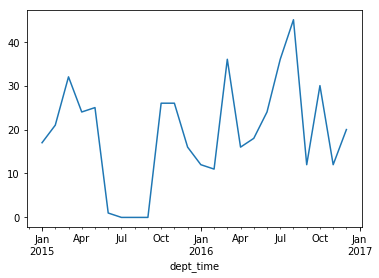

In [43]:
test2.plot()
plt.show()

<h3 style='color:green'>2.n번째 자전거는 매일 used_time의 평균이 어떻게 변했을까? </h3>

In [46]:
test2 = test.usedtime_hour.resample('D').mean()

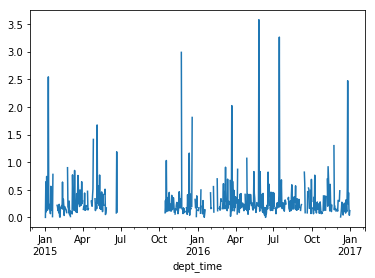

In [47]:
test2.plot()
plt.show()

<h3 style='color:green'>2-1.n번째 자전거는 매일 used_time의 moving average가 어떻게 변했을까? </h3>

In [74]:
test2 = test2.rolling(window=5).mean()

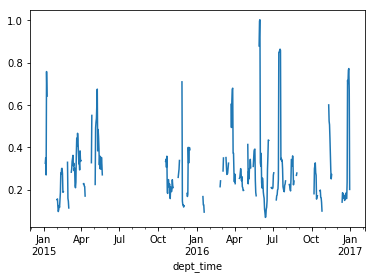

In [75]:
test2.plot()
plt.show()

<h3>각각의 터미널 별로 다시 groupby 하여 위와 같이 일별로 얼마나 새로 자전거가 들어왔는지도 볼 수 있음.</h3>

단, 여기서 첫 줄발지를 .iloc[1:] 해서 빼주지 않았으므로 첫 시작은 무조건 moved에 True 들어감. (minor하다고 생각함.)


원래 test.iloc[1:][test.moved==True] 이런식으로 해줘야 함. 

<h3 style='color:green'>3.n번째 터미널에는 매일 자전거가 얼마나 유입되었는가? - 인기가 많은 출발지인지 알 수 있음. </h3>

In [76]:
# 다 합친 것. 

df = pd.concat(bike_groups)

In [79]:
# 지희가 df 달라고 해서 여기서 뽑아 줌. 

df.to_pickle("bikes_all.p")

In [48]:
df = pd.read_pickle("bikes_all.p")

In [49]:
df = df[df.moved==True]

In [50]:
terminals = df.groupby("dept_terminal")

In [51]:
terminal_groups = [terminals.get_group(x) for x in terminals.groups]

In [103]:
test1 = terminal_groups[2].copy(deep=True)

In [100]:
test2 = terminal_groups[10].copy(deep=True)

In [101]:
test1.index = test1.dept_time
test2.index = test2.dept_time

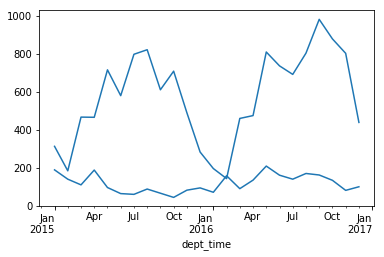

In [102]:
test1 = test1.moved.resample('M').sum()

test1.plot(subplots = True)

test2 = test2.moved.resample('M').sum()
test2.plot(subplots = True)

plt.show()

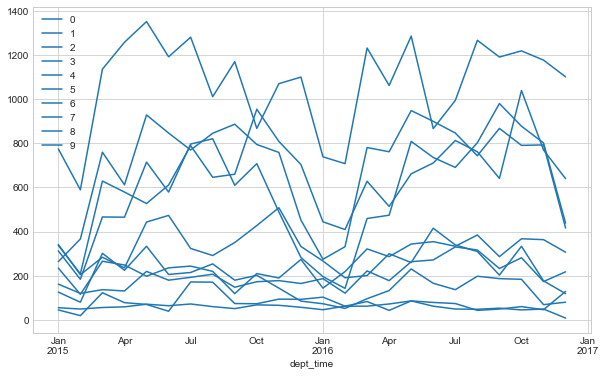

In [140]:
test_terminals = [x.copy(deep=True) for x in terminal_groups[:10]]

plt.figure(figsize=(10,6))

for i,d in enumerate(test_terminals):
    d.index = d.dept_time
    test_terminals[i] = d.moved.resample("M").sum()

for i,d in enumerate(test_terminals):
#     d.plot(subplots=True, label=i, color=random.rand(10,1))
    d.plot(subplots=True, label=i)


plt.legend()
plt.show()

In [291]:
test = df.head(10).copy(deep=True)

In [36]:
#실수해서 datetime --> string으로 다시 바꿔야 할 때 코드. 

for i in ['dept_time', 'arr_time']:
    df[i] = df[i].apply(lambda x: x.strftime("%y%m%d"))

In [41]:
# 실수해서 str타입 변수 뒤에 붙은거 뜯어낼 때 쓰는 코드. 

df["dept_time"] = df['dept_time'].map(lambda x: x.rstrip('dept_time'))
df['arr_time'] = df['arr_time'].map(lambda x: x.rstrip('arr_time'))